<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#In-this-notebook" data-toc-modified-id="In-this-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>In this notebook</a></span></li><li><span><a href="#PDF,-CDF-and-Quantile-functions" data-toc-modified-id="PDF,-CDF-and-Quantile-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PDF, CDF and Quantile functions</a></span><ul class="toc-item"><li><span><a href="#Standard-Gaussian" data-toc-modified-id="Standard-Gaussian-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Standard Gaussian</a></span></li><li><span><a href="#Other-examples-of-continuous-distributions" data-toc-modified-id="Other-examples-of-continuous-distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Other examples of continuous distributions</a></span></li><li><span><a href="#Examples-of-discrete-distributions" data-toc-modified-id="Examples-of-discrete-distributions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examples of discrete distributions</a></span></li></ul></li><li><span><a href="#Calculating-V@R,-ES-using-quantiles" data-toc-modified-id="Calculating-V@R,-ES-using-quantiles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculating V@R, ES using quantiles</a></span><ul class="toc-item"><li><span><a href="#Value-at-risk" data-toc-modified-id="Value-at-risk-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Value at risk</a></span></li><li><span><a href="#Expected-shortfall" data-toc-modified-id="Expected-shortfall-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Expected shortfall</a></span></li></ul></li><li><span><a href="#Monte-Carlo-approximations" data-toc-modified-id="Monte-Carlo-approximations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Monte Carlo approximations</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

# Risk measures
**Camilo A. Garcia Trillos - 2020**

---

## In this notebook

- we learn some probability distributions available in scipy.stats.
- we use the associated functions to calculate V@R and ES
- we introduce a Monte Carlo estimator for both V@R and ES

Some distributions do not have easy formulas for their value at risk or expeted shortfall. We introduce here some functions and procedures in Python to approximate their value.

We start by importing the modules we use in this notebook. The package scipy.stats contains some statistical distributions and tests. We will use some of the functions on it.

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import scipy.stats as st

## PDF, CDF and Quantile functions

It is possible to calculate directly the PDF, CDF and quantile function for several distributions in Pytho, thanks to the scipy.stats library. This is achieved with the following general structure: 

- PDF: *st.[name distribution].pdf(probability, parameters)*
- CDF: *st.[name distribution].cdf(probability, parameters)*
- Quantile function: *st.[name distribution].ppf(probability, parameters)*



Let us illustrate with some examples.

### Standard Gaussian

Text(0, 0.5, 'pdf')

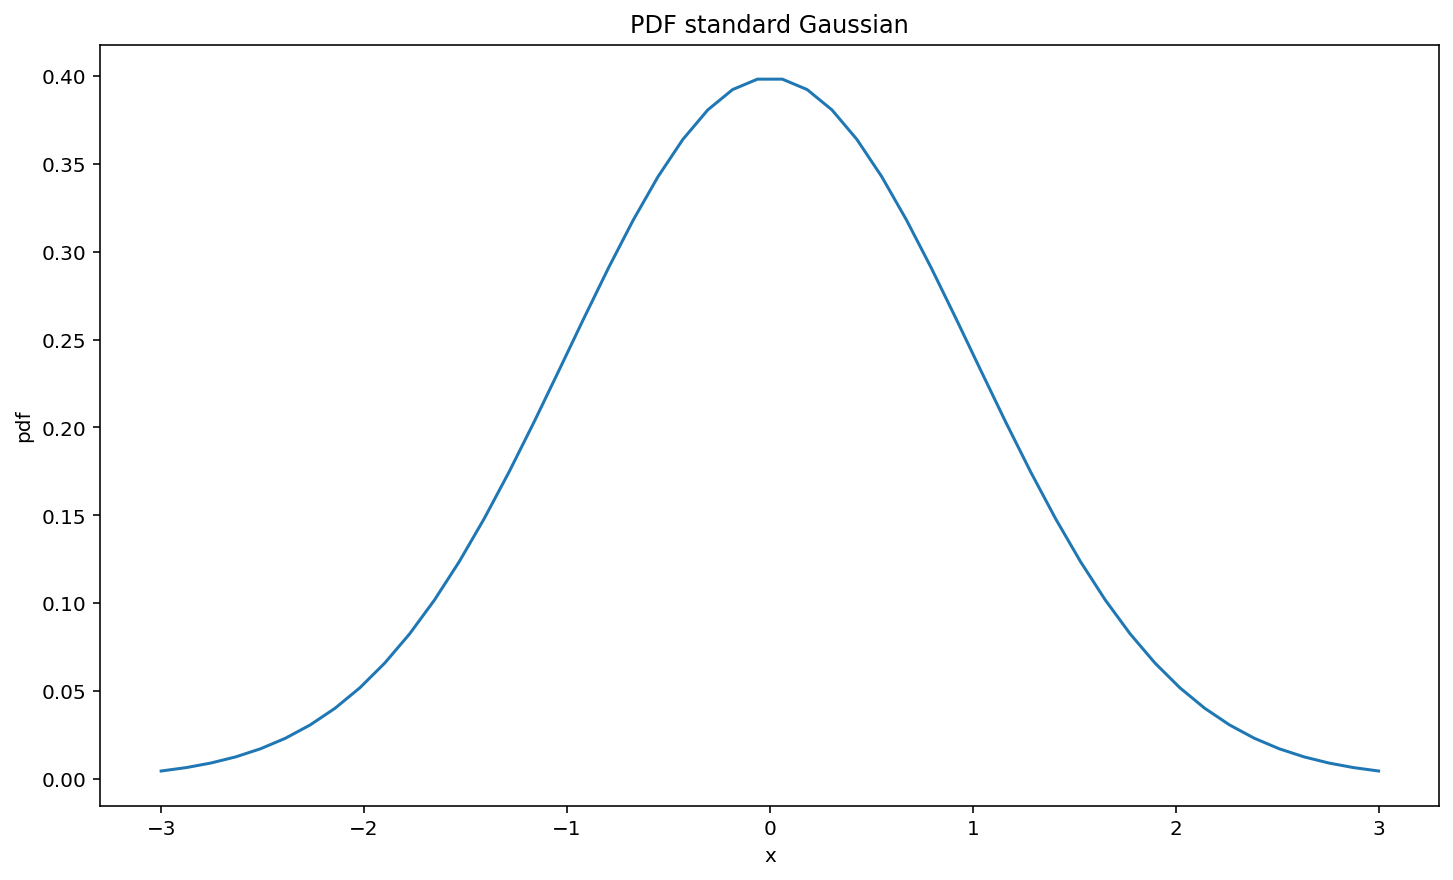

In [2]:
# Plotting the pdf

x = np.linspace(-3,3,50) #Take 50 equally spaced points between -3 and 3
y = st.norm.pdf(x) # calculate the pdf for each one 

plt.plot(x, y) # plot
plt.title('PDF standard Gaussian')
plt.xlabel('x')
plt.ylabel('pdf')

We recover the familiar bell-shaped pdf.

Text(0, 0.5, 'cdf')

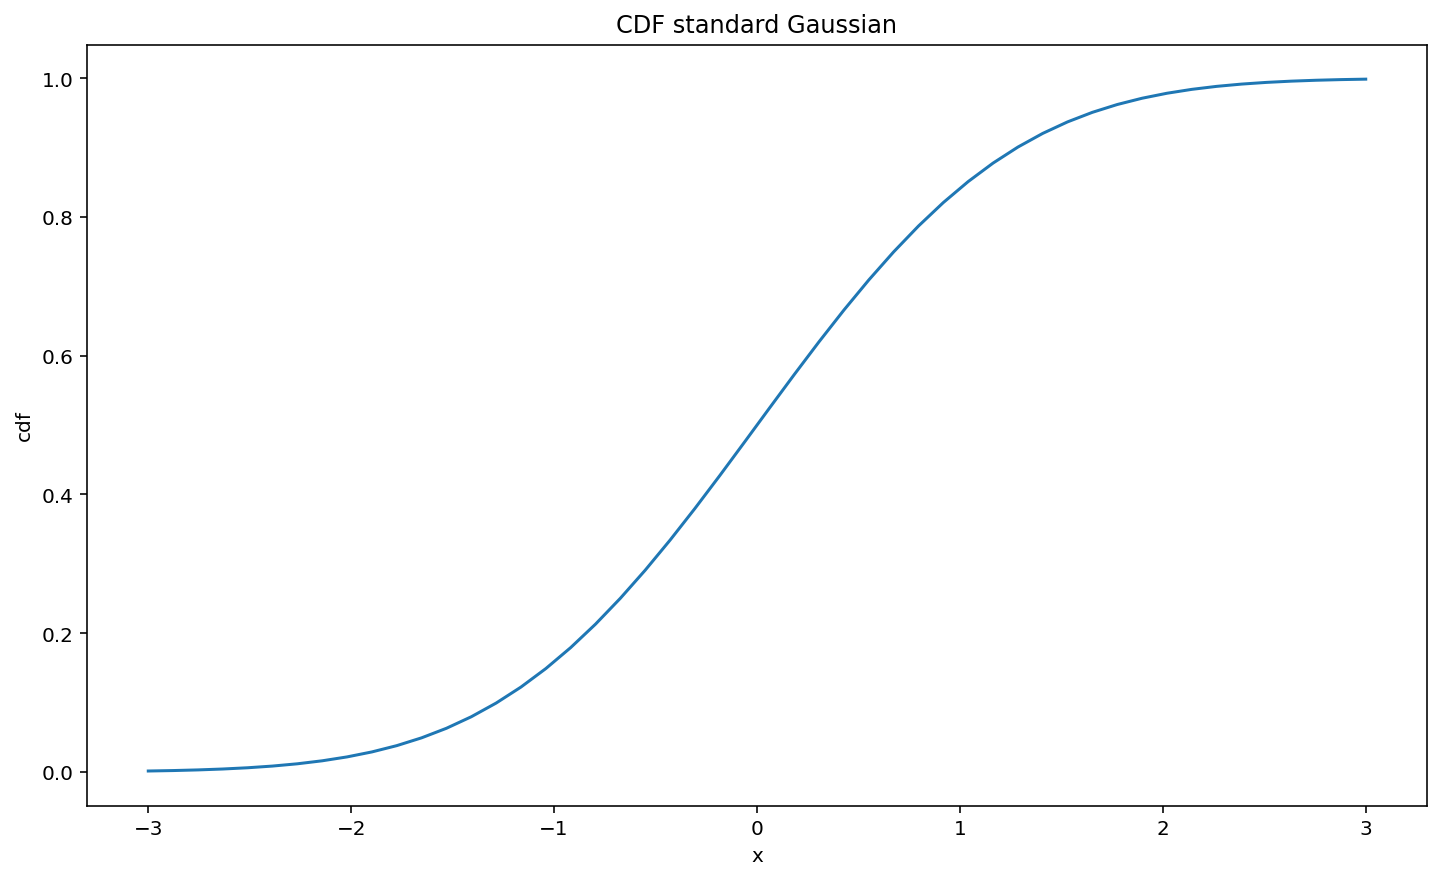

In [3]:
# Plotting the cdf

x = np.linspace(-3,3,50) #Take 50 equally spaced points between -3 and 3
y = st.norm.cdf(x) # calculate the pdf for each one 

plt.plot(x, y) # plot
plt.title('CDF standard Gaussian')
plt.xlabel('x')
plt.ylabel('cdf')

The plot illustrates the properties of the cdf: non-decreasing, with limits and $-\infty$ and $\infty$ equal to 0 and 1 respectively.

Text(0, 0.5, 'x')

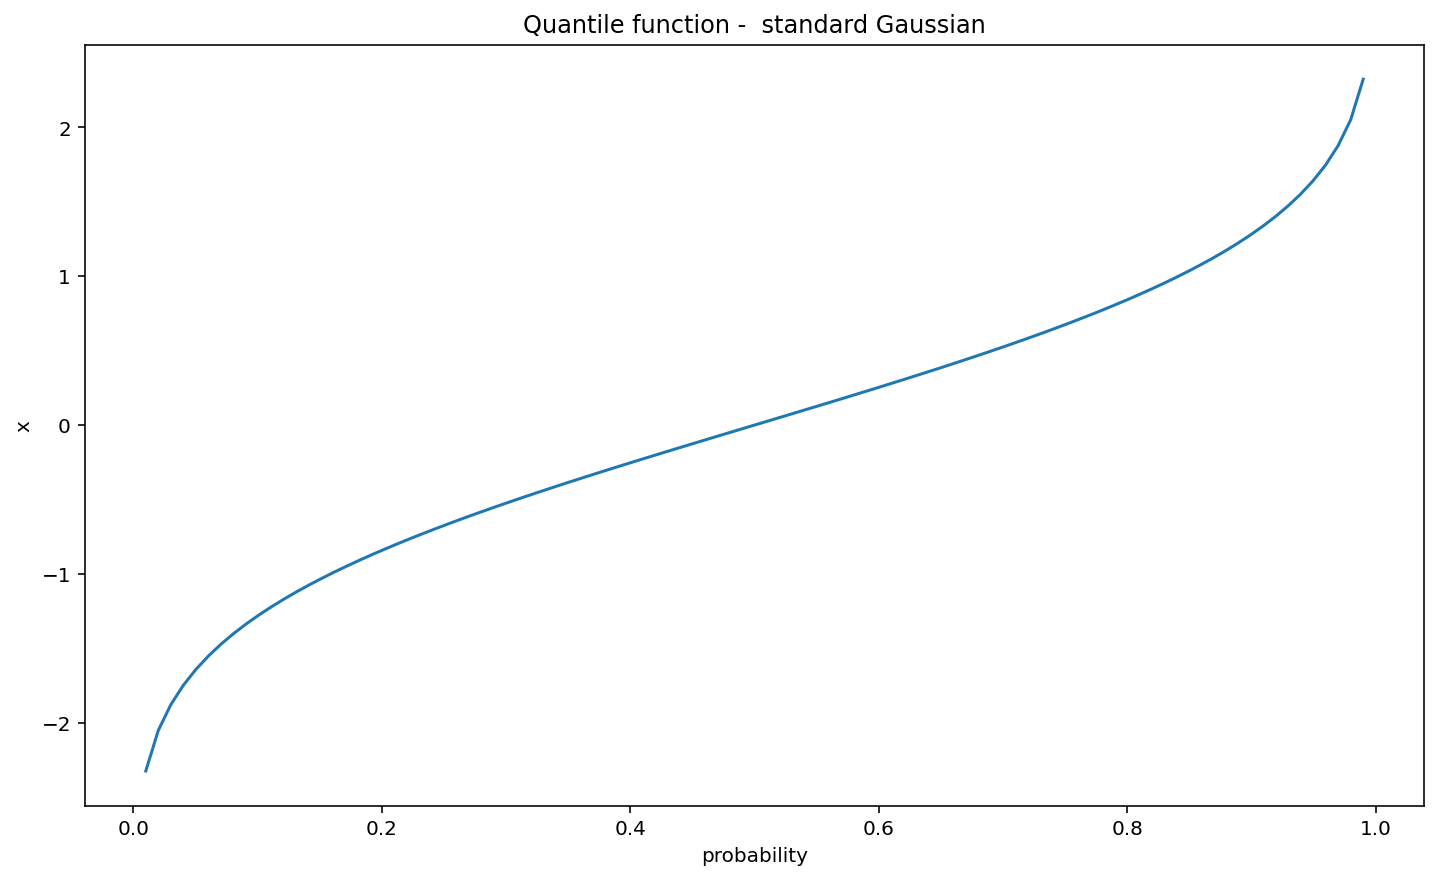

In [4]:
# Plotting the quantile function

x = np.linspace(0,1,100) #Take 100 equally spaced points between 0 and 1
y = st.norm.ppf(x) # calculate the pdf for each one 

plt.plot(x, y) # plot
plt.title('Quantile function -  standard Gaussian')
plt.xlabel('probability')
plt.ylabel('x')

Note how this is the reflection of the CDF plot around the x=y line.

Some numbers that appear commonly are associated to the quantile at levels 0.95 and 0.99 for the Gaussian distribution:

In [5]:
# Standard Gaussian, quantile 0.99

print('Quantile at level 0.95: ', st.norm.ppf(0.95))
print('Quantile at level 0.99: ', st.norm.ppf(0.99))

Quantile at level 0.95:  1.6448536269514722
Quantile at level 0.99:  2.3263478740408408


### Other examples of continuous distributions

In [6]:
#Gaussian with mean 1 and variance 4, quantile 0.99
print(st.norm.ppf(0.99,1,2))

#Due to the specific structure of Gaussian variables, this coincides with a rescaling of the standard one:
print(st.norm.ppf(0.99)*2+1)


5.6526957480816815
5.6526957480816815


Text(0, 0.5, 'pdf')

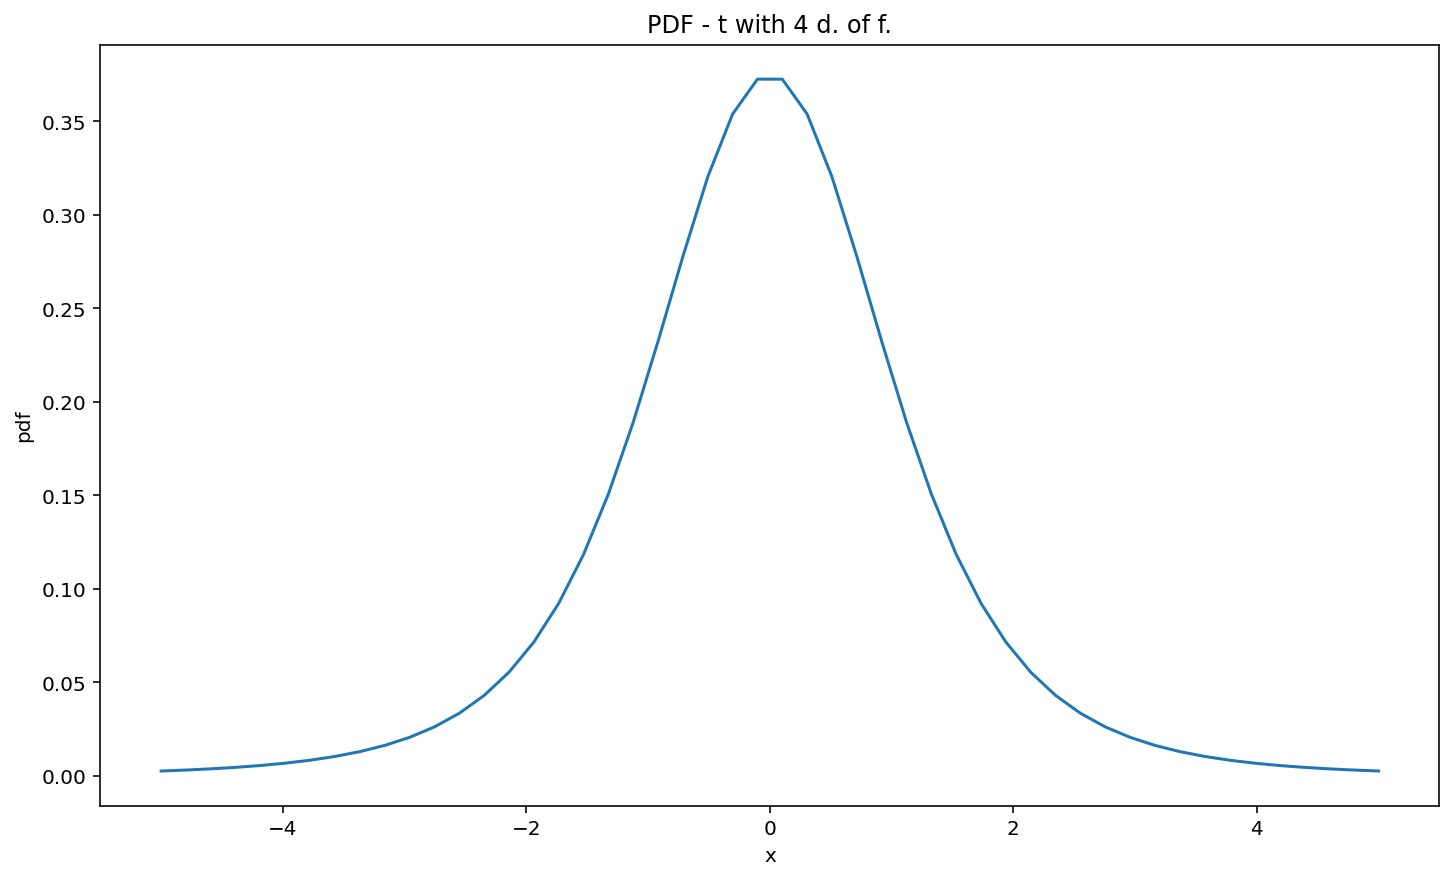

In [7]:
# The pdf of a standard - t with 4 degrees of freedom.


x = np.linspace(-5,5,50) #Take 50 equally spaced points between -3 and 3
y = st.t.pdf(x,4) # calculate the pdf for each one 

plt.plot(x, y) # plot
plt.title('PDF - t with 4 d. of f.')
plt.xlabel('x')
plt.ylabel('pdf')

In [8]:
# A t-distribution with 4 degrees of freedom and standard form, quantile 0.99

st.t.ppf(0.99,4)

3.7469473879811366

In [9]:
# A chi-square distribution with 4 degrees of freedom

st.chi.ppf(0.99,4)

3.6437211935036444

There are many more distributions tahn the ones above. Have a look at the help to know more.

### Examples of discrete distributions

In the case of discrete distributions, there is no pdf function. Instead, we have a probabity function ($p(x):=\mathbb P(X=x)$) which is calculated in the scipy.stats package using the following structure:

- st.[name distribution].pdf(probability, parameters)

The CDF and quantile are calculated as for the continuous case.

Let us see one example with the Poisson distribution. Recall that if $X$ is distributed Poisson with parameter $\mu$,
$$P[X=n] = e^{-\mu} \frac{\mu^n}{n!} $$

Text(0, 0.5, 'probability')

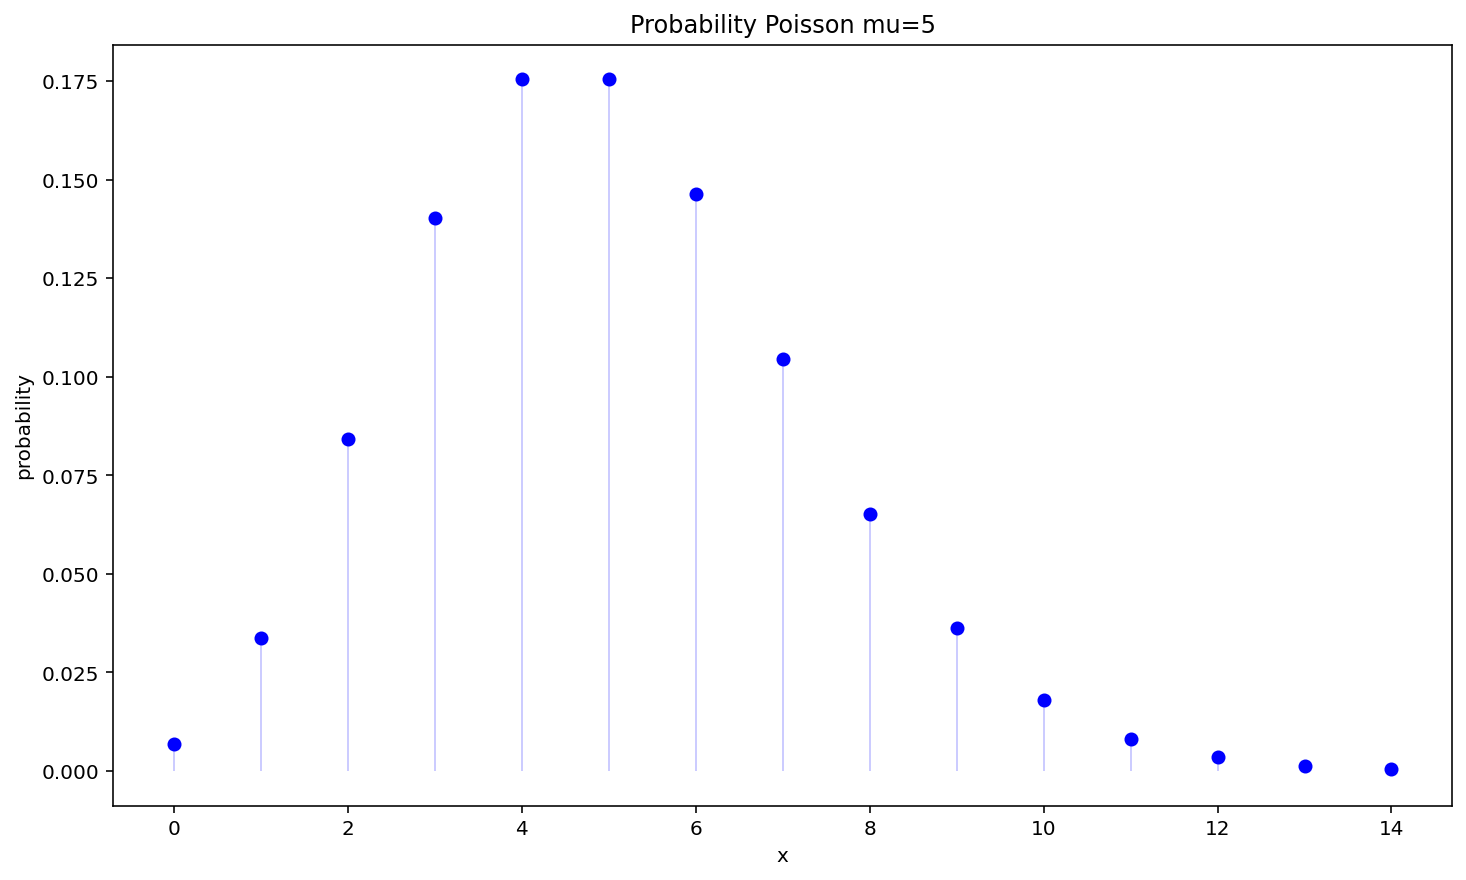

In [10]:
# Plotting probability

x = np.arange(15)
y = st.poisson.pmf(x,5)

plt.plot(x, y,'bo') # plot
plt.title('Probability Poisson mu=5')
plt.vlines(x, 0, y, colors='b', lw=1, alpha=0.2)
plt.xlabel('x')
plt.ylabel('probability')




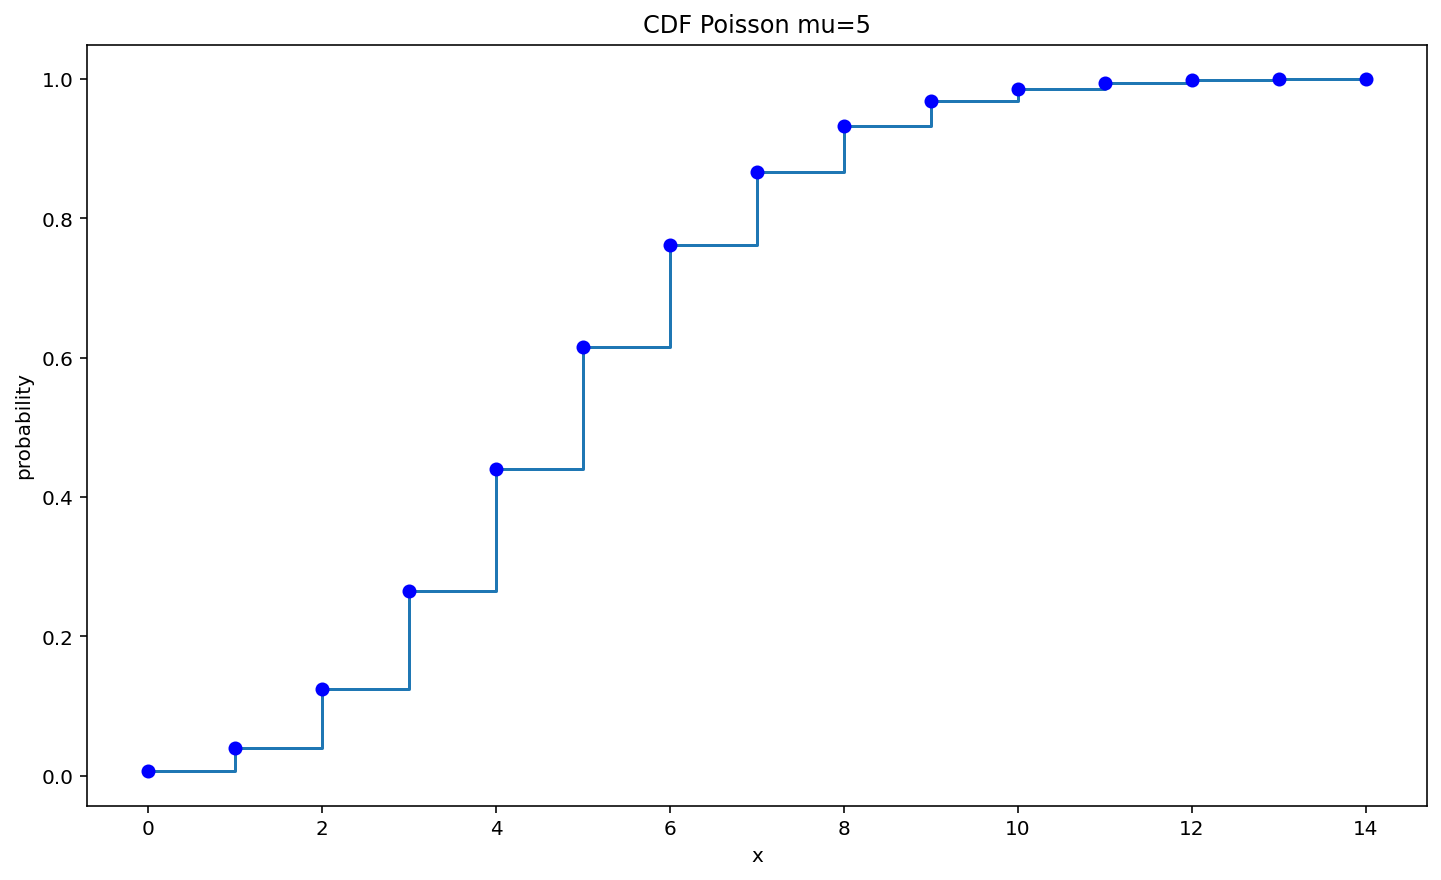

In [11]:
# Plotting cdf

x = np.arange(15)
y = st.poisson.cdf(x,5)

plt.step(x, y, where='post') # the post label assumes a right continuous function
plt.plot(x, y, 'bo') # plot
plt.title('CDF Poisson mu=5')
#plt.vlines(x, 0, y, colors='b', lw=1, alpha=0.2)
plt.xlabel('x')
plt.ylabel('probability');

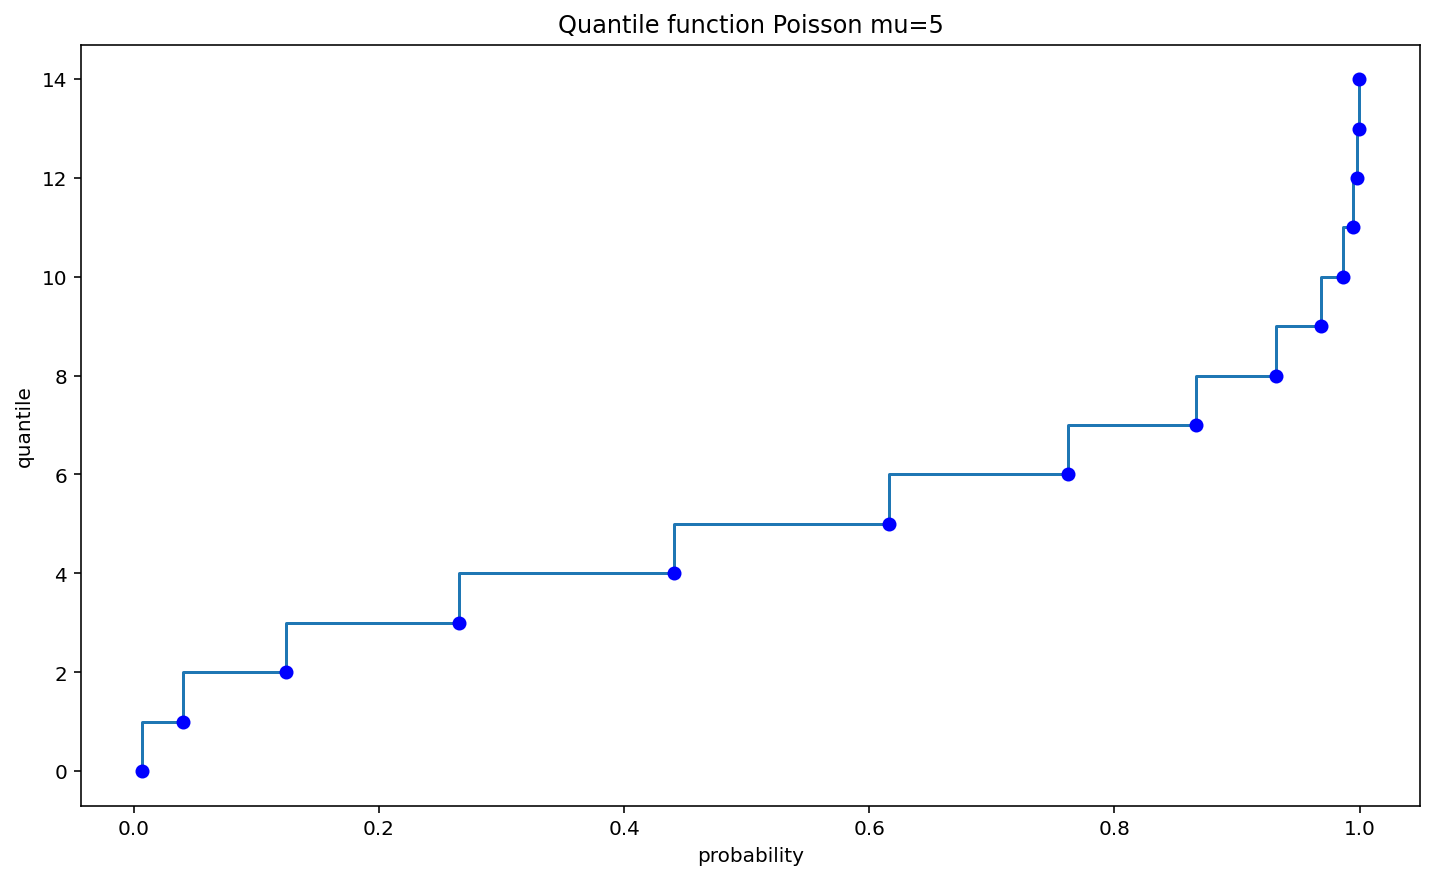

In [12]:
# Plotting quantile

x = st.poisson.cdf(np.arange(15),5) #Take the values we plotted before
y = st.poisson.ppf(x,5)

plt.step(x, y, where='pre') # the pre label assumes a left continuous function
plt.plot(x, y, 'bo') # plot
plt.title('Quantile function Poisson mu=5')
#plt.vlines(x, 0, y, colors='b', lw=1, alpha=0.2)
plt.xlabel('probability')
plt.ylabel('quantile');

## Calculating V@R, ES using quantiles

Let us implement two functions that receive a (static) instance of a probability distribution from scipy.stats, and return V@R and ES.


### Value at risk

Taking $X$ to be a random variable denoting, for example, profit and losses, we can easily calculate Value at Risk whenever $X$ is distributed following one of the distributions in scipy.stats, by using the quantile function.  

We can show that (see lecture notes)
$$ \mathrm{V@R}^\alpha(X) = -q_{X}(1-\alpha+ \epsilon \mathbb 1_{ F_X(q_X(1-\alpha)) = 1-\alpha  }) ,$$
for any $\epsilon\in (0,P[X=q_X(1-\alpha)])$ with the convention that $\epsilon = 0$ if this set is empty.
Note that in the case of a continuous distribution we get
$$\mathrm{V@R}^\alpha(X) = -q_{X}(1-\alpha).$$


In [13]:
def varisk(dist, alpha):
    
    if alpha<=0 or alpha>=1:
        raise ValueError('Alpha is outside of valid interval')
    
    x_aux = dist.ppf(1-alpha)
    
    try:  #check if calling the function pmf raises an error
        dist.pmf(0)
    except:  # if an error, the distribution is continuous because there is no prob. mass function
        return -x_aux   
    #Otherwise, the distribution is discrete
    if dist.cdf(x_aux)==1-alpha:
        return -1.*dist.ppf( 1-alpha+dist.pmf(x_aux)*alpha )
    return -x_aux


Let us see some examples:

In [14]:

# Value at risk at level 0.99 for a Gaussian with mean 1 and variance 4
print(varisk(st.norm(1,2), 0.99))

#The same from an exact formula (see lecture notes):
print( 2*st.norm.ppf(0.99,0,1)-1  )



3.6526957480816815
3.6526957480816815


We got the value we were expecting. Let us now check the case of a bernoulli random variable with $P[X=1]=0.75$.

In [15]:
print('V@R level 0.99',varisk(st.bernoulli(0.75), 0.99))
print('V@R level 0.75',varisk(st.bernoulli(0.75), 0.75))
print('V@R level 0.60',varisk(st.bernoulli(0.75), 0.60))
      


V@R level 0.99 -0.0
V@R level 0.75 -1.0
V@R level 0.60 -1.0


### Expected shortfall

Recall (see the lecture notes) that

$$\begin{split} 
\mathrm{ES}^\alpha & = \frac{1}{1-\alpha} \int_{\alpha}^1 \mathrm{V@R}^u(X)\mathrm d u \\
& =  \frac  1 {1-\alpha} \left\{ - \mathbb{E}[X \mathbb{1}_{X <-\mathrm{V@R}^\alpha(X)}] + (\tilde \alpha-\alpha) \mathrm{V@R}^\alpha(X) \right\}
\end{split}$$

where $\tilde \alpha:= F_{-X}(\mathrm{V@R}^\alpha(X)) = 1-F_{X}(-\mathrm{V@R}^\alpha(X)) + P[X = -\mathrm{V@R}^\alpha(X)]$.


We are going to use the method 'expect' associated to a given distribution in scipy.stats. Look at the help of this function to understand more, but here are two examples of use:


In [16]:
# Example for expect

print('Expected value of a standard Gaussian:', st.norm(0,1).expect(lambda x: x)) 
print('Second moment of a standard Gaussian: ', st.norm(0,1).expect(lambda x: x**2)) 
print('Expected value of X in the interval [0,\infty):',st.norm(0,1).expect(lambda x: x, lb =0)) 


Expected value of a standard Gaussian: 0.0
Second moment of a standard Gaussian:  1.000000000000001


Expected value of X in the interval [0,\infty): 0.39894228040143215


We can use this available function to define our own function to calculate expected shortfall.

In [17]:
def es(dist,alpha):
        
    var_alpha = varisk(dist,alpha)
    x_aux = (-1*dist.expect(func = lambda x: x, ub = -var_alpha))/(1-alpha)
    
    
    try:  #check if calling the function pmf raises an error
        dist.pmf(0)
    except:  # if an error, the distribution is continuous because there is no prob. mass function
        return x_aux
    
    p_varalpha = dist.pmf(-1*var_alpha)
    
    alpha_tilde = 1-dist.cdf(-1*var_alpha) + p_varalpha
    return x_aux + (alpha_tilde-alpha-p_varalpha)*var_alpha/(1-alpha)
     
    

In [18]:
# Expected shortfall at level 0.99 for a Gaussian with mean 1 and variance 4
alpha = 0.99
print(es(st.norm(1,2), alpha))

#The same from an exact formula (see lecture notes):
print( -1 + 2*( st.norm(0,1).pdf( st.norm(0,1).ppf(alpha))/(1-alpha)  ) )

4.330428440691598
4.330428440691612


As can be seen, there is a small difference due to the approximation error in the function "expect", but the approximation is very good.

Let us compare both value at risk and expected shortfall for different values

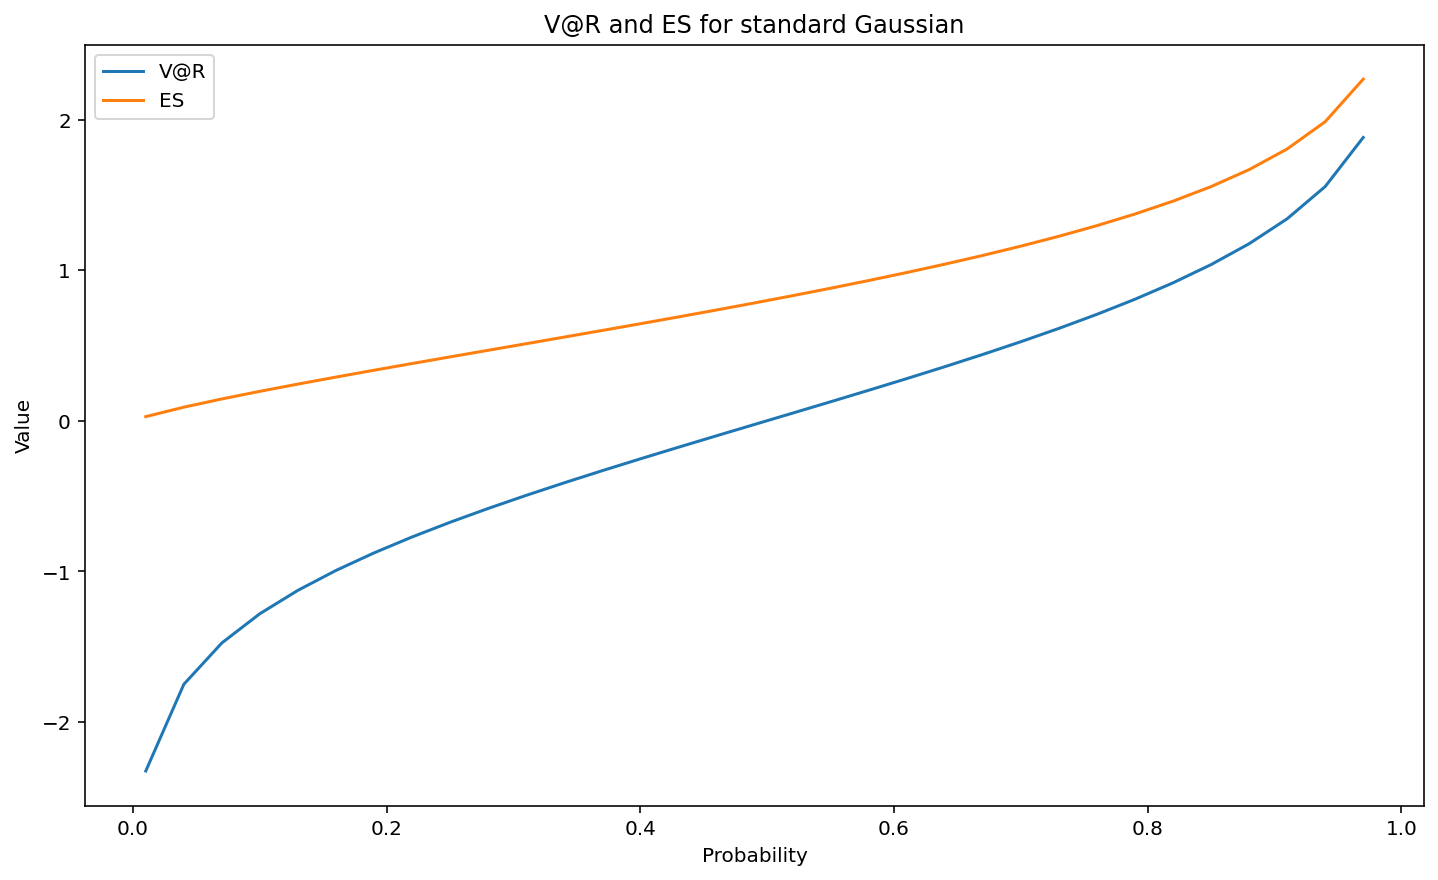

In [19]:
alpha_vec = np.arange(0.01,1,0.03)
test_dist = st.norm(0,1)
plt.plot(alpha_vec, [varisk(test_dist,i) for i in alpha_vec], label='V@R')
plt.plot(alpha_vec, [es(test_dist,i) for i in alpha_vec], label='ES')
plt.legend()
plt.title('V@R and ES for standard Gaussian')
plt.xlabel('Probability')
plt.ylabel('Value');

We can verify visually several properties:
- Expected shortfall is always larger or equal than value at risk
- Expected shortfall tends to $-E[X]$ when $\alpha\downarrow 0$. 

Let us now check the case of a Bernoulli random variable with $P[X=1]=0.75$.

In [20]:
print('ES level 0.99',es(st.bernoulli(0.75), 0.99))
print('ES level 0.60',es(st.bernoulli(0.75), 0.6))

ES level 0.99 0.0
ES level 0.60 -0.3750000000000002


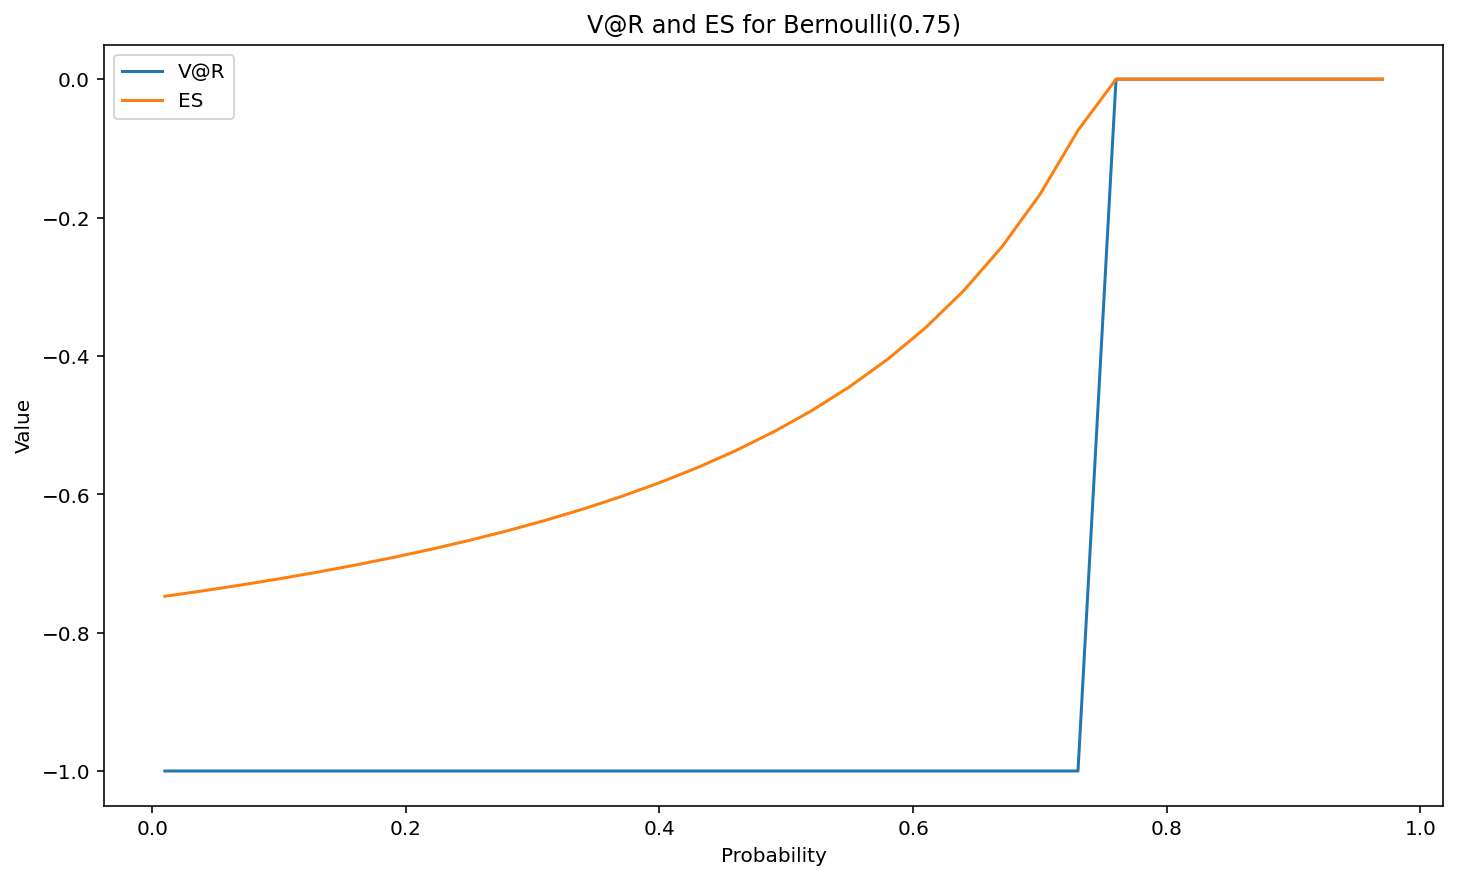

In [21]:
alpha_vec = np.arange(0.01,1,0.03)
test_dist = st.bernoulli(0.75)
plt.plot(alpha_vec, [varisk(test_dist,i) for i in alpha_vec], label='V@R')
plt.plot(alpha_vec, [es(test_dist,i) for i in alpha_vec], label='ES')
plt.legend()
plt.title('V@R and ES for Bernoulli(0.75)')
plt.xlabel('Probability')
plt.ylabel('Value');

This is an example that shows that expected shortfall is more regular with respect to the level. Here it is continuous in alpha while value at risk is not.


## Monte Carlo approximations

A Monte Carlo approximation might be useful either to replace the calculation of integrals for expected shortfall as above, or to calculate both value at risk and expected shortfall in cases where we do not have an explicit expression for the pdf. 

The idea is simply replace the calculation of expected shortfall or value at risk on the distribution bu that of the empirical measure coming from a large sample of the distribution.

Suppose that $X_1, \ldots, X_n$ are all i.i.d. samples of the same distribution in $\mathbb R$. Let us also denote by $X_{(1)}, \ldots, X_{(n)} $ this sample after ordering (i.e. $X_{(i)} \leq X_{(j)}$ if and only if $i\leq j$). Then we have that
$$\begin{split}
\mathrm{V@R}^\alpha(X) & \approx -X_{( i_\alpha )} \\
\mathrm{ES}^\alpha(X) &\approx -\frac{1}{i_\alpha }\sum_{k=1}^{i_\alpha} X_{( k )}
\end{split}
$$

where $i_\alpha:= \lfloor n(1-\alpha)\rfloor$.

**Remark:** Naturally, this is not the only estimator, There are other choices of estimator that will be presented later in the lecture notes.





Let us define a function that calculate the approximation of value at risk and expected shortfall for any sample

In [22]:
def var_es_sample(sample,alpha):    
    ss=np.sort(sample)
    ialpha = int(sample.size * (1-alpha))
    return -ss[ialpha], -ss[:ialpha].mean()


We can test by comparing in cases as the ones we had before. Remember the use of the random number generator.

We start with the standard normal case.

In [23]:
NMC = 1000000 # Number of samples
rng = default_rng(0)
sample_normal = rng.normal(1,2,size=NMC)
var_es_sample(sample_normal, 0.99)

(3.6554153431984657, 4.344458055149295)

Comparing with the values before (3.6526957480816815, 4.330428440691612), this is not a bad approximation. Note, though that we required a large sample (here, 1000000). A larger sample might be required for higher levels in VAR and ES. 

Also, remember that this estimator is random (this is why we had to fix the seed of the generator). You can check this by removing the seed.

Let us see also the case of the Bernoulli(0.75).

In [24]:
rng = default_rng(123)
sample_bernoulli=(rng.random(size = NMC)<=0.75) +0
var_es_sample(sample_bernoulli, 0.99)

(0, -0.0)

In [25]:
var_es_sample(sample_bernoulli, 0.6)

(-1, -0.3761125)

Again, we get close enough values to the ones defined before.

## Exercises

1. Plot the values of value at risk for a t-distribution as a function of the number of degrees of freedom. Repeat the exercise with expected shortfall. What do you observe?


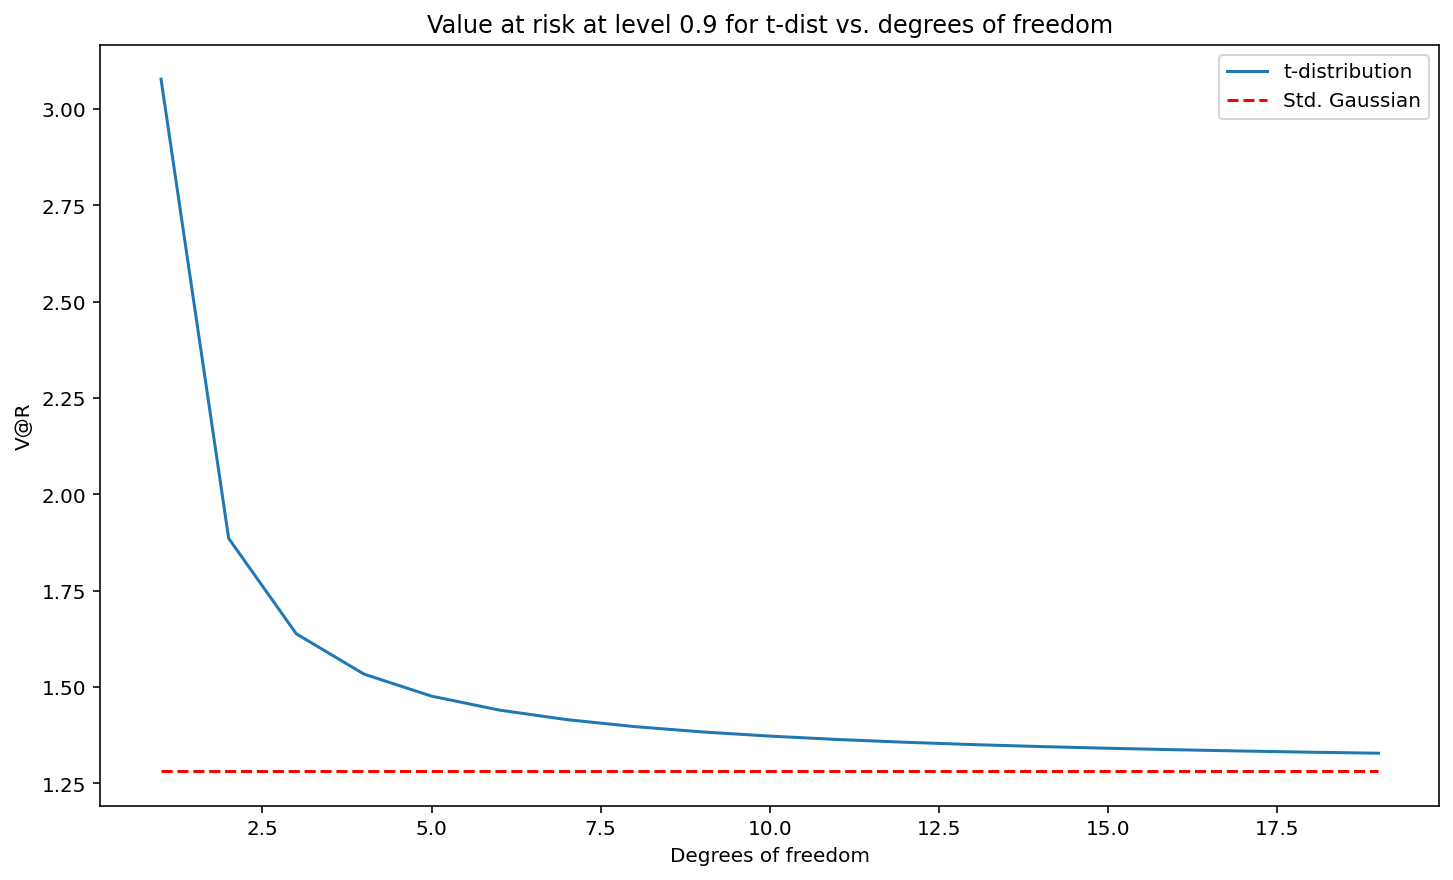

In [26]:
alpha_ref = 0.9
var_gaussian = varisk(st.norm,alpha_ref)
max_dof = 20
var_gaussian = varisk(st.norm,alpha_ref)
dof = np.arange(1,max_dof)
var_vec = [varisk(st.t(i), alpha_ref) for i in dof]
plt.plot(dof,var_vec)
plt.plot(dof,np.ones(max_dof-1)*var_gaussian,'--r')


plt.title('Value at risk at level ' + str(alpha_ref)+' for t-dist vs. degrees of freedom')
plt.xlabel('Degrees of freedom')
plt.ylabel('V@R')
plt.legend(['t-distribution','Std. Gaussian'])


Value at risk for values larger than 0.5 decreases as a function of the number of degrees of freedom. As expected, it seems to tend asymptotically to the value at risk of a standard Gaussian. This shows that this distribution with low degrees of freedom is riskier than a standard Gaussian from a tail point of view.

2. Assume $X$ follows a standard Gaussian. Write a function $\phi(\alpha)$ such that $\mathrm{V@R}^{\phi(\alpha)}(X) = \mathrm{ES}^\alpha(X)$. Test the function. What is the value associated to 0.975?

We know that for $X$ a standard Gaussian, we have
$$\mathrm{V@R}^\alpha(X) = \Phi^{-1}(\alpha); \qquad \mathrm{ES}^\alpha(X) = \frac{1}{1-\alpha}\varphi(\Phi^{-1}(\alpha)).$$

Therefore, we have 
$$\phi(\alpha) = \Phi\left(\frac{1}{1-\alpha} \varphi(\Phi^{-1}(\alpha))\right)$$


In [27]:
def phi_special(alpha):
    
    if alpha>=1 or alpha<=0:
        raise ValueError('The variable alpha must be in between 0 and 1')
    
    return st.norm.cdf(st.norm.pdf(st.norm.ppf(alpha))/(1-alpha))
    
phi_special(0.975)

0.9903012596460189

The above means that, if a distribution is standard Gaussian, we can create a connection between the value at risk at level 99% (approx) and Expected Shortfall at level 97.5%. As we will discuss later in the course, this has been used in the standard model under Basel 3 to define an easy backtest for expected shortfall

3. Assume that you have invested £100, equally, in two investments with P&L given respectively by a) A Gaussian random variable with mean 60 and sd 100; and b) An exponential random variable with mean 75. Assume further that both are independent. 

Calculate the value at risk and expected shortfall of your total P&L.




Since we are given directly the P&L of each investment, we do not really need to use the initial value: we simply sum up the P&L to find the total value. However, summing up these two distributions does not give a known distribution. Hence we will use the Monte Carlo approach to estimate the value at risk and expected shortfall at the given 

In [32]:
sample_size = 1000000
msample = rng.normal(60,100,sample_size) + rng.exponential(75,sample_size)

Let us illustrate the resulting distribution by looking at its pdf

Text(0.5, 1.0, 'Histogram for total P&L')

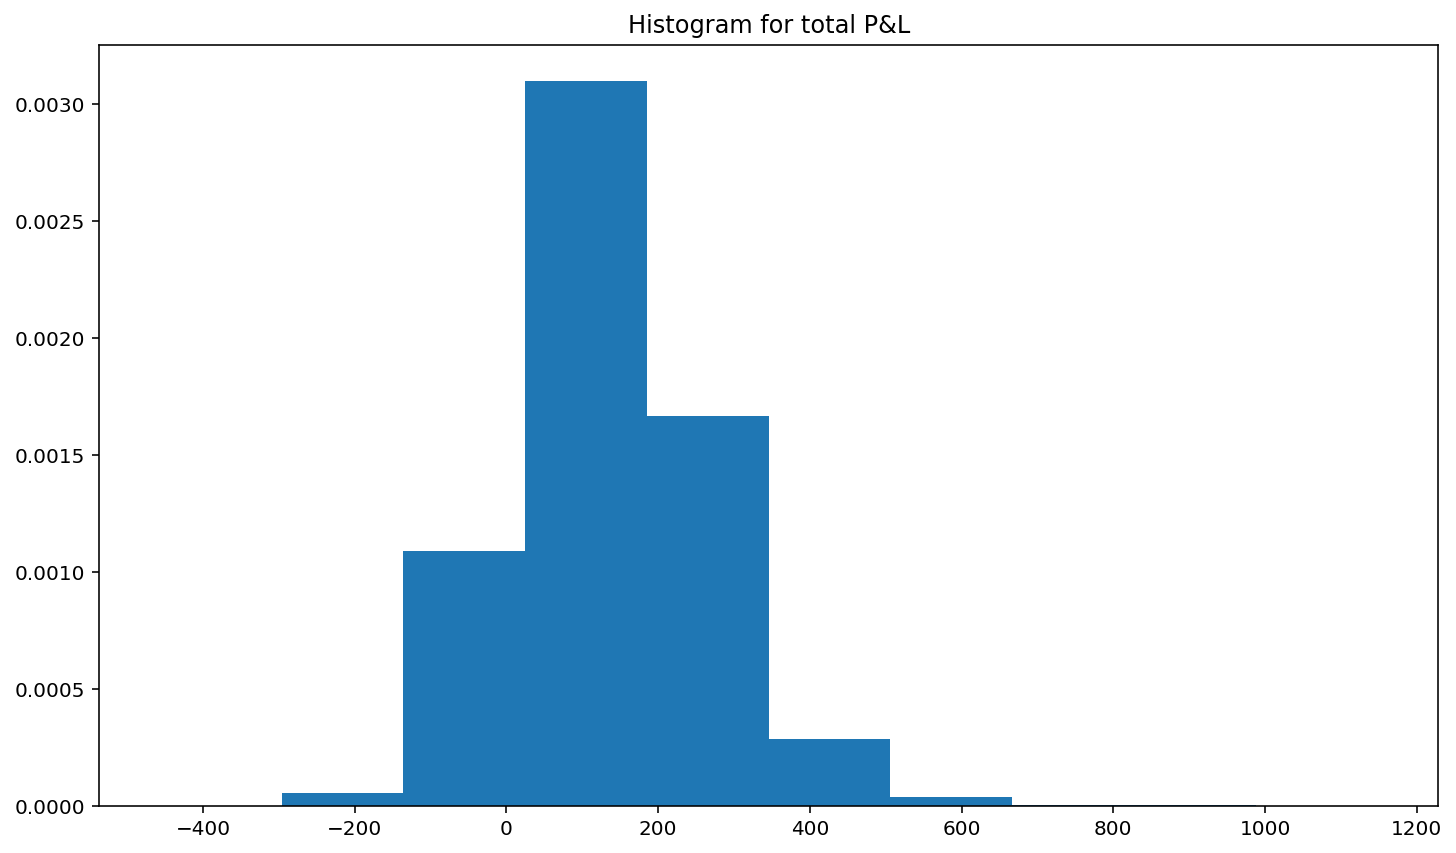

In [36]:
plt.hist(msample, density=True)
plt.title('Histogram for total P&L')

In [39]:
print('The P&L sample has mean {:.2f} and standard deviation {:.2f}.'.format(msample.mean(),msample.std() ))

The P&L sample has mean 135.00 and standard deviation 124.85.


The pdf looks a bit schewed to the right. We therefore expect the losses to be less severe than a Gaussian with shared mean and variance. This is the effect of adding an exclusively postive variable with a fat(ish) tail like the exponential distribution.

In [41]:
alpha_level = 0.95
var_es_sample(msample,alpha_level)

(56.772695035703194, 101.16449784433254)

In [46]:
print('The value at risk and ES at level ',alpha,' for the P&L are respectively: ',var_es_sample(msample,alpha_level))

The value at risk and ES at level  0.99  for the P&L are respectively:  (56.772695035703194, 101.16449784433254)


In [45]:
print('The value at risk and ES at level ',alpha,' for a Gaussian with the same mean and sample are respectively: ', varisk(st.norm(135,124.85), alpha_level), es(st.norm(135,124.85), alpha_level))

The value at risk and ES at level  0.99  for a Gaussian with the same mean and sample are respectively:  70.35997532489128 122.52969401730198
